In [181]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [182]:
df_cga_prediction = pd.read_excel (r'C:\Users\amin\Downloads\amine.xlsx',parse_dates = ['Mois'], index_col =0)
df_cga_prediction=df_cga_prediction.drop(columns=['Ann_e', 'Temperature', 'precipitation','WindVitesse'])

In [183]:
df=df_cga_prediction
df.columns

Index(['Nombre_de_sinistre', 'Colonne1'], dtype='object')

In [192]:
df=df.drop(['Colonne1'],axis=1)

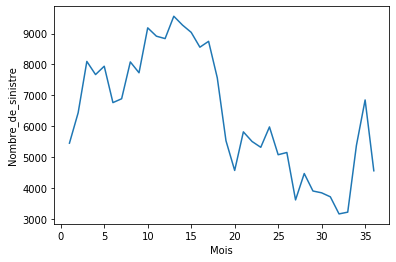

In [193]:
plt.xlabel('Mois')
plt.ylabel('Nombre_de_sinistre')
plt.plot(df)

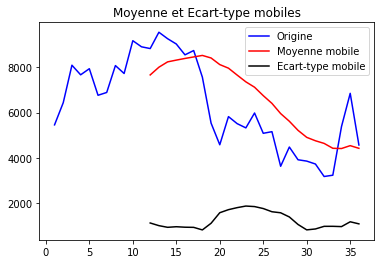

In [194]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [195]:
def get_stationarity(timeseries):
    
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    result = adfuller(timeseries['Nombre_de_sinistre'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

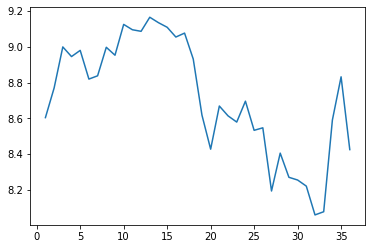

In [196]:
df_log = np.log(df)
plt.plot(df_log)

In [197]:
rolling_meana = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log +rolling_meana
df_log_minus_mean.dropna(inplace=True)


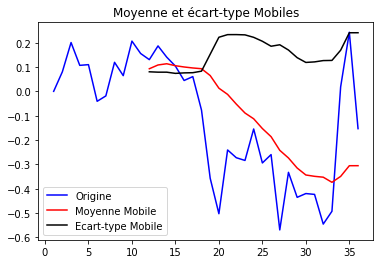

Statistiques ADF : -2.0597788837531006
p-value : 0.2609920858814282
Valeurs Critiques :
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [205]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

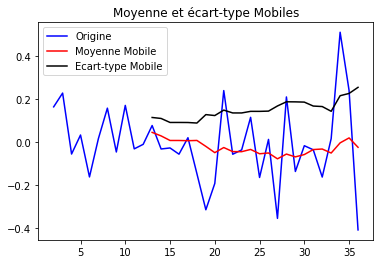

Statistiques ADF : -5.579258703477176
p-value : 1.4088123181537938e-06
Valeurs Critiques :
	1%: -3.639224104416853
	5%: -2.9512301791166293
	10%: -2.614446989619377


In [201]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


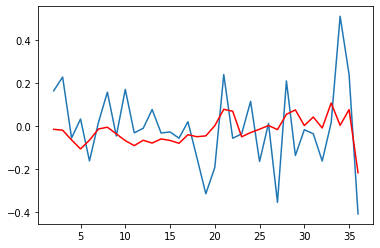

In [206]:

model = ARIMA(df_log, order=(7,1,2))
results = model.fit(disp=-2)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')


C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\amin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


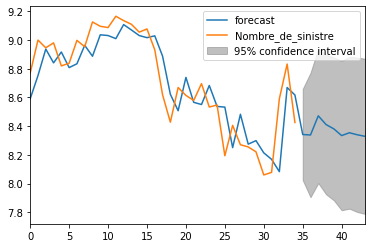

In [207]:
fig = results.plot_predict(1,44)


In [204]:
results.fittedvalues

Mois
2    -0.013408
3    -0.017454
4    -0.062776
5    -0.104603
6    -0.063775
7    -0.011933
8    -0.003591
9    -0.034671
10   -0.066053
11   -0.089182
12   -0.064419
13   -0.077228
14   -0.058090
15   -0.065131
16   -0.078302
17   -0.038546
18   -0.047770
19   -0.043889
20    0.003527
21    0.079734
22    0.070658
23   -0.048086
24   -0.028642
25   -0.012838
26    0.004312
27   -0.014732
28    0.056386
29    0.076980
30    0.004072
31    0.043807
32   -0.007187
33    0.108718
34    0.005163
35    0.078251
36   -0.215251
dtype: float64

In [ ]:
from math import exp, expm1